# 데이터 시각화

## 1. 시계열 데이터 시각화

- 야후 파이낸스의 삼성 전자 주가 데이터를 다운로드 하여 시각화 해보자 

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

- 한글과 음수 부호 안 깨지도록 설정해준다.

In [2]:
import matplotlib.font_manager as fm
fm.findSystemFonts()
path = 'C:\\Users\\uos\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=path,size=10).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [40]:
df_samsung = yf.download('005930.KS',start='2019-01-01',end='2021-12-31',progress=False)
df_samsung.rename(columns={'Adj Close':'adj_close'},inplace=True)
df_samsung

Open     High      Low    Close     adj_close    Volume
Date                                                                  
2019-01-02  39400.0  39400.0  38550.0  38750.0  35331.632812   7847664
2019-01-03  38300.0  38550.0  37450.0  37600.0  34283.078125  12471493
2019-01-04  37450.0  37600.0  36850.0  37450.0  34146.320312  14108958
2019-01-07  38000.0  38900.0  37800.0  38750.0  35331.632812  12748997
2019-01-08  38000.0  39200.0  37950.0  38100.0  34738.968750  12756554
...             ...      ...      ...      ...           ...       ...
2021-12-24  80200.0  80800.0  80200.0  80500.0  80138.101562  12086380
2021-12-27  80600.0  80600.0  79800.0  80200.0  79839.453125  10783368
2021-12-28  80200.0  80400.0  79700.0  80300.0  79939.000000  18226325
2021-12-29  80200.0  80200.0  78500.0  78800.0  78800.000000  19794795
2021-12-30  78900.0  79500.0  78100.0  78300.0  78300.000000  14236700

[742 rows x 6 columns]

In [41]:
df_samsung = df_samsung.loc[:,['adj_close']]
df_samsung['simple_return_rate'] = df_samsung.adj_close.pct_change()
df_samsung['log_return_rate'] = np.log(df_samsung.adj_close/df_samsung.adj_close.shift(1))
df_samsung

adj_close  simple_return_rate  log_return_rate
Date                                                         
2019-01-02  35331.632812                 NaN              NaN
2019-01-03  34283.078125           -0.029678        -0.030127
2019-01-04  34146.320312           -0.003989        -0.003997
2019-01-07  35331.632812            0.034713         0.034124
2019-01-08  34738.968750           -0.016774        -0.016917
...                  ...                 ...              ...
2021-12-24  80138.101562            0.007509         0.007481
2021-12-27  79839.453125           -0.003727        -0.003734
2021-12-28  79939.000000            0.001247         0.001246
2021-12-29  78800.000000           -0.014248        -0.014351
2021-12-30  78300.000000           -0.006345        -0.006365

[742 rows x 3 columns]

[Text(0.5, 1.0, '삼성전자 로그 수익률'), Text(0, 0.5, 'Log return rate')]

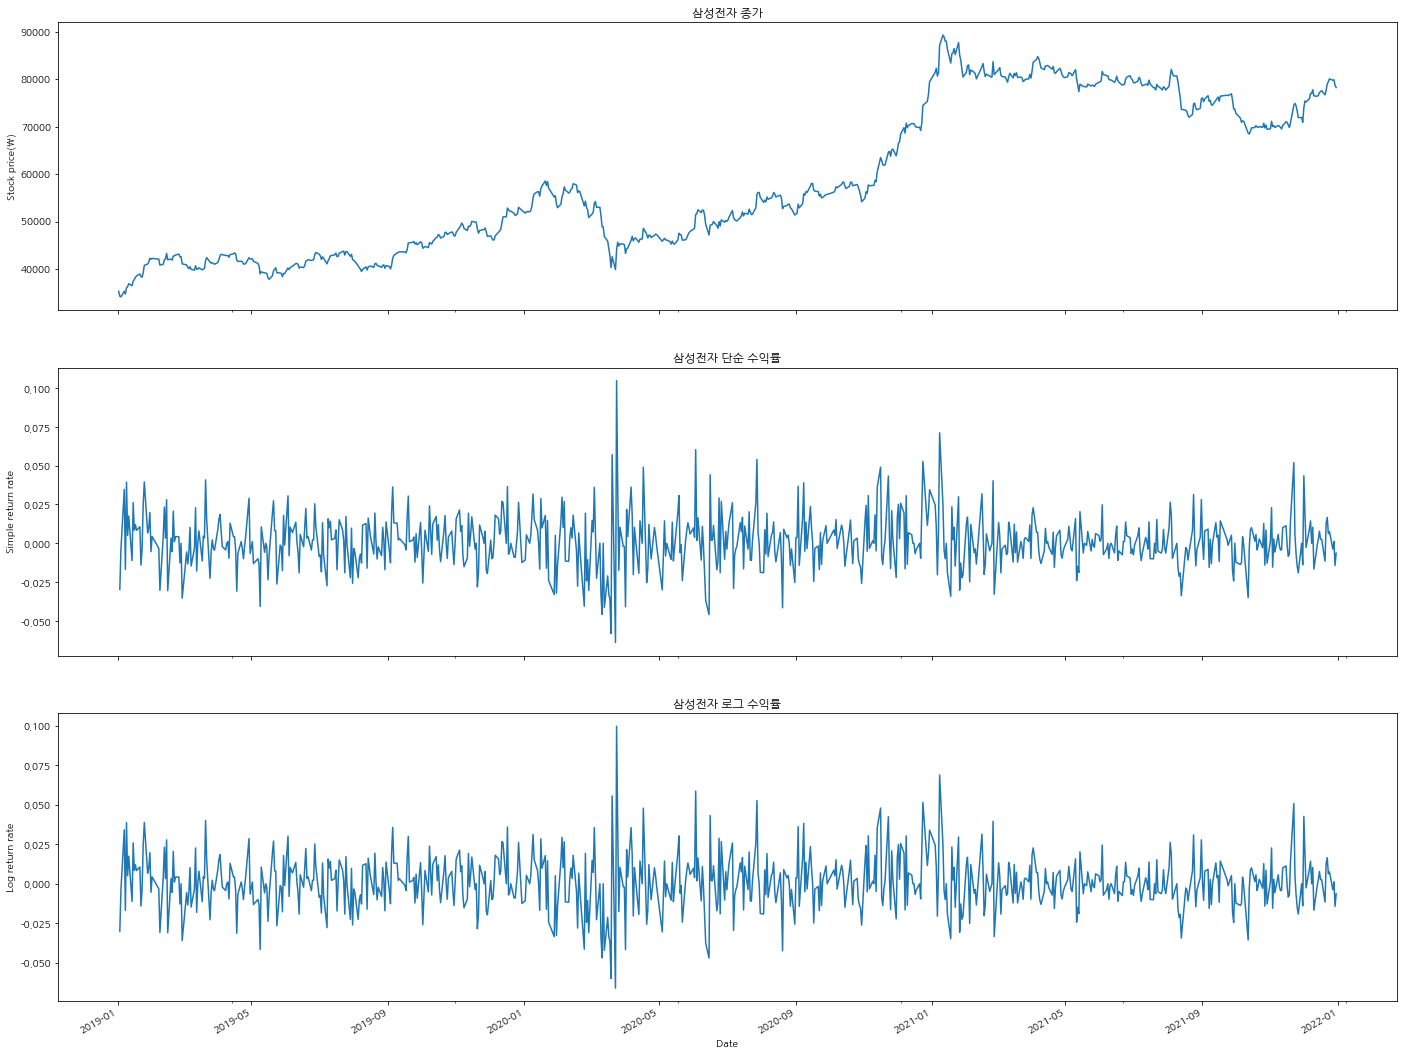

In [42]:
fig, ax = plt.subplots(3,1,figsize=(24,20),sharex=True)

df_samsung.adj_close.plot(ax=ax[0])
ax[0].set(title='삼성전자 종가',ylabel='Stock price(\)')
df_samsung.simple_return_rate.plot(ax=ax[1])
ax[1].set(title='삼성전자 단순 수익률',ylabel='Simple return rate')
df_samsung.log_return_rate.plot(ax=ax[2])
ax[2].set(title='삼성전자 로그 수익률',ylabel='Log return rate')

In [43]:
import cufflinks as cf
from plotly.offline import iplot,init_notebook_mode

# cf.set_config_file(world_readable=True,theme='pearl',offline=True)

init_notebook_mode()

In [44]:
df_samsung.iplot(subplots=True,shape=(3,1),shared_xaxes=True,title='삼성 전자')

## 2. 이상치 식별

- $3\sigma$ 규칙, 이동 평균을 이용하여 이상치를 식별한다.

In [45]:
# rolling : 이동 계산, window 옵션 : 몇 개씩 연산할지 입력
df_rolling = df_samsung[['simple_return_rate']].rolling(window=21).agg(['mean','std'])
df_rolling.columns = df_rolling.columns.droplevel() #열이름 중 level1을 없애줌

In [46]:
df_outlier = df_samsung.join(df_rolling)
df_outlier

adj_close  simple_return_rate  log_return_rate      mean  \
Date                                                                      
2019-01-02  35331.632812                 NaN              NaN       NaN   
2019-01-03  34283.078125           -0.029678        -0.030127       NaN   
2019-01-04  34146.320312           -0.003989        -0.003997       NaN   
2019-01-07  35331.632812            0.034713         0.034124       NaN   
2019-01-08  34738.968750           -0.016774        -0.016917       NaN   
...                  ...                 ...              ...       ...   
2021-12-24  80138.101562            0.007509         0.007481  0.004302   
2021-12-27  79839.453125           -0.003727        -0.003734  0.005029   
2021-12-28  79939.000000            0.001247         0.001246  0.005089   
2021-12-29  78800.000000           -0.014248        -0.014351  0.005069   
2021-12-30  78300.000000           -0.006345        -0.006365  0.002696   

                 std  
Date                  
2019-01-02       NaN  
2019-01-03       NaN  
2019-01-04       NaN  
2019-01-07       NaN  
2019-01-08       NaN  
...              ...  
2021-12-24  0.013872  
2021-12-27  0.012960  
2021-12-28  0.012938  
2021-12-29  0.012969  
2021-12-30  0.009749  

[742 rows x 5 columns]

- 이상치 판별 함수 생성

In [47]:
def identify_outliers(data):
    x = data['simple_return_rate']
    mu = data['mean']
    sigma = data['std']
    if (x>mu + 3*sigma)|(x<mu - 3*sigma):
        return 1
    else:
        return 0

In [48]:
df_outlier['outlier'] = df_outlier.apply(identify_outliers,axis=1)
outliers = df_outlier.loc[df_outlier['outlier']==1,['simple_return_rate']]
outliers

simple_return_rate
Date                          
2020-06-03            0.060311
2021-11-22            0.051966

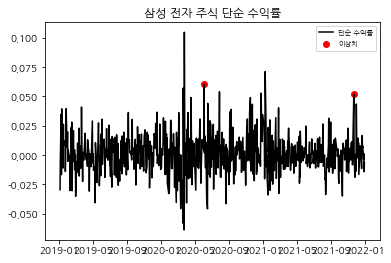

In [49]:
fig,ax = plt.subplots()

ax.plot(df_outlier.index,df_outlier.simple_return_rate,color='black',label='단순 수익률')
ax.scatter(outliers.index,outliers.simple_return_rate,color='red',label='이상치')
ax.set_title('삼성 전자 주식 단순 수익률')
ax.legend(loc='upper right',fontsize=7)

## 3. 자산 수익의 정형화된 사실 조사

정형화된 사실 : 많은 경험적 자산 수익률에서 나타나는 통계적인 속성들

In [50]:
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

### 1) 수익률 정규성

- 삼성전자 주식의 로그 수익률의 히스토그램과 Q-Q plot을 그려보자 

In [51]:
lr_range = np.linspace(np.min(df_samsung.log_return_rate),np.max(df_samsung.log_return_rate),num= 40)
mu = df_samsung.log_return_rate.mean()
sigma = df_samsung.log_return_rate.std()
norm_pdf = scs.norm.pdf(lr_range,loc=mu, scale=sigma)

In [52]:
norm_pdf

array([7.38314683e-03, 1.98857383e-02, 5.02015198e-02, 1.18786459e-01,
       2.63446201e-01, 5.47635851e-01, 1.06700568e+00, 1.94857228e+00,
       3.33534865e+00, 5.35107311e+00, 8.04665647e+00, 1.13413555e+01,
       1.49826764e+01, 1.85519157e+01, 2.15309431e+01, 2.34213688e+01,
       2.38801155e+01, 2.28210436e+01, 2.04413469e+01, 1.71616264e+01,
       1.35046182e+01, 9.96049915e+00, 6.88580668e+00, 4.46173197e+00,
       2.70973648e+00, 1.54250140e+00, 8.22998429e-01, 4.11573471e-01,
       1.92917076e-01, 8.47556962e-02, 3.49013359e-02, 1.34706990e-02,
       4.87318777e-03, 1.65238440e-03, 5.25150709e-04, 1.56434218e-04,
       4.36771692e-05, 1.14301555e-05, 2.80365600e-06, 6.44573194e-07])

In [53]:
fig, ax = plt.subplots(1,2,figsize=(15,10))

# Histogram
sns.distplot(df_samsung.log_return_rate,kde=False,norm_hist=True,ax=ax[0])
ax[0].set_title('삼성 전자 로그 수익률 히스토그램')
ax[0].plot(lr_range,norm_pdf,'g',lw=3,color='blue',label=f'N({mu:.4f},{sigma**2:.4f})')
ax[0].legend(loc='upper right')

# Q-Q plot
q = sm.qqplot(df_samsung.log_return_rate,line='q',ax=ax[1])
ax[1].set_title('Q-Q plot')

C:\Users\uos\miniconda3\envs\dong\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\uos\AppData\Local\Temp/ipykernel_9560/1843215910.py:6: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.

C:\Users\uos\miniconda3\envs\dong\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



Text(0.5, 1.0, 'Q-Q plot')

- 평균, 중위수, 최소값, 최대값, 표준편차, 왜도 , 첨도 , 정규성 검정 결과를 나타내보자

In [54]:
jb_test = scs.jarque_bera(df_samsung.log_return_rate.values[1:,])

print('---------- Descriptive Statistics ----------')
print('Range of dates:', min(df_samsung.index.date), '-', max(df_samsung.index.date))
print('Number of observations:', df_samsung.shape[0])
print(f'Mean: {df_samsung.log_return_rate.mean():.4f}')
print(f'Median: {df_samsung.log_return_rate.median():.4f}')
print(f'Min: {df_samsung.log_return_rate.min():.4f}')
print(f'Max: {df_samsung.log_return_rate.max():.4f}')
print(f'Standard Deviation: {df_samsung.log_return_rate.std():.4f}')
print(f'Skewness: {df_samsung.log_return_rate.skew():.4f}') #왜도
print(f'Kurtosis: {df_samsung.log_return_rate.kurtosis():.4f}') #첨도
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}') 

---------- Descriptive Statistics ----------
Range of dates: 2019-01-02 - 2021-12-30
Number of observations: 742
Mean: 0.0011
Median: 0.0000
Min: -0.0660
Max: 0.0996
Standard Deviation: 0.0167
Skewness: 0.3708
Kurtosis: 2.7469
Jarque-Bera statistic: 245.39 with p-value: 0.00


- 유의수준 0.05라고 할 때 Jarque-Bera 통계량의 p-value 가 0으로 0.05보다 작으므로 '정규분포다' 라는 귀무가설 기각

### 2) 변동성 클러스터링

- 주가의 변동성이 한 번 커지면 변동성이 커진 상황이 한동안 지속될 가능성이 높고, 낮아지면 낮아진 상황이 한동안 유지된다.

- 로그 수익률이 크고 작음이 번갈아가면서 나타나는 것처럼 보이면 변동성 클러스터가 확연히 보이는 것이다.

In [55]:
df_samsung.log_return_rate.plot(title='Daily Samsung Electronics log return rate')

<AxesSubplot:title={'center':'Daily Samsung Electronics log return rate'}, xlabel='Date'>

### 3) 수익률의 자기 상관 부재

- Autocorrelation function (ACF)를 이용하여 확인

In [56]:
n_lags = 50
alpha = 0.05

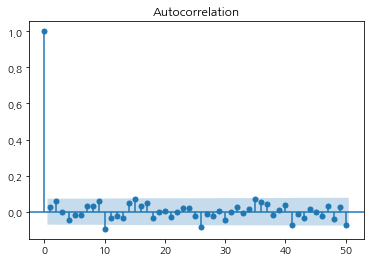

In [57]:
acf=smt.graphics.plot_acf(df_samsung.log_return_rate.values[1:],lags=n_lags,alpha=alpha)

- ACF 그림을 봤을 때, 자기 상관관계가 없는 것으로 보인다. 

### 4) 제곱 수익률과 절대 수익률에서 작고 감소하는 자기 상관

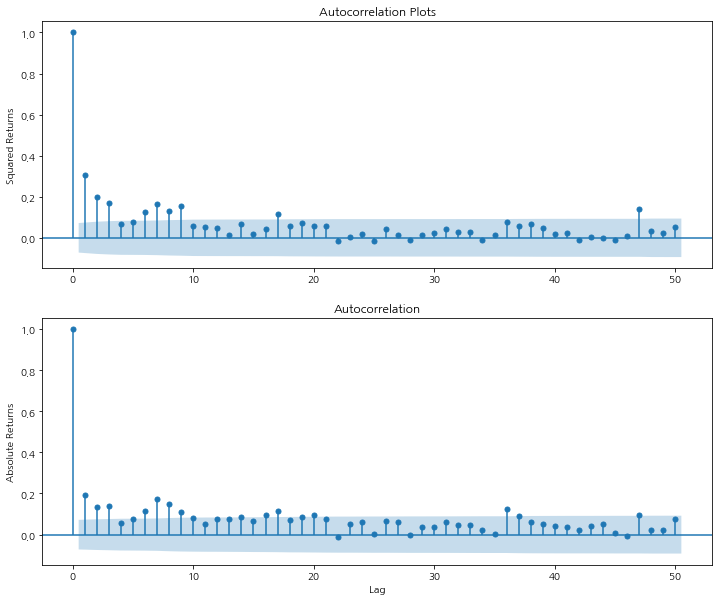

In [58]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

smt.graphics.plot_acf(df_samsung.log_return_rate.values[1:] ** 2, lags=n_lags, 
                      alpha=alpha, ax = ax[0])
ax[0].set(title='Autocorrelation Plots',
          ylabel='Squared Returns')

smt.graphics.plot_acf(np.abs(df_samsung.log_return_rate.values[1:]), lags=n_lags, 
                      alpha=alpha, ax = ax[1])
ax[1].set(ylabel='Absolute Returns',
          xlabel='Lag')

plt.show()

- 제곱 수익률과 절대 수익률에서 자기 상관관계가 감소하는 방향성을 가짐을 보인다.

### 5. 레버리지 효과

- 여기서는 변동성과 로그 수익률이 음의 상관관계를 가지는 효과를 말한다.

- 변동성 척도를 이동 표준편차로 계산한 후 시계열을 시각화한다.

In [69]:
df_samsung['moving_std_252'] = df_samsung[['log_return_rate']].rolling(window=252,min_periods=0).std()
df_samsung['moving_std_21'] = df_samsung[['log_return_rate']].rolling(window=21,min_periods=0).std()

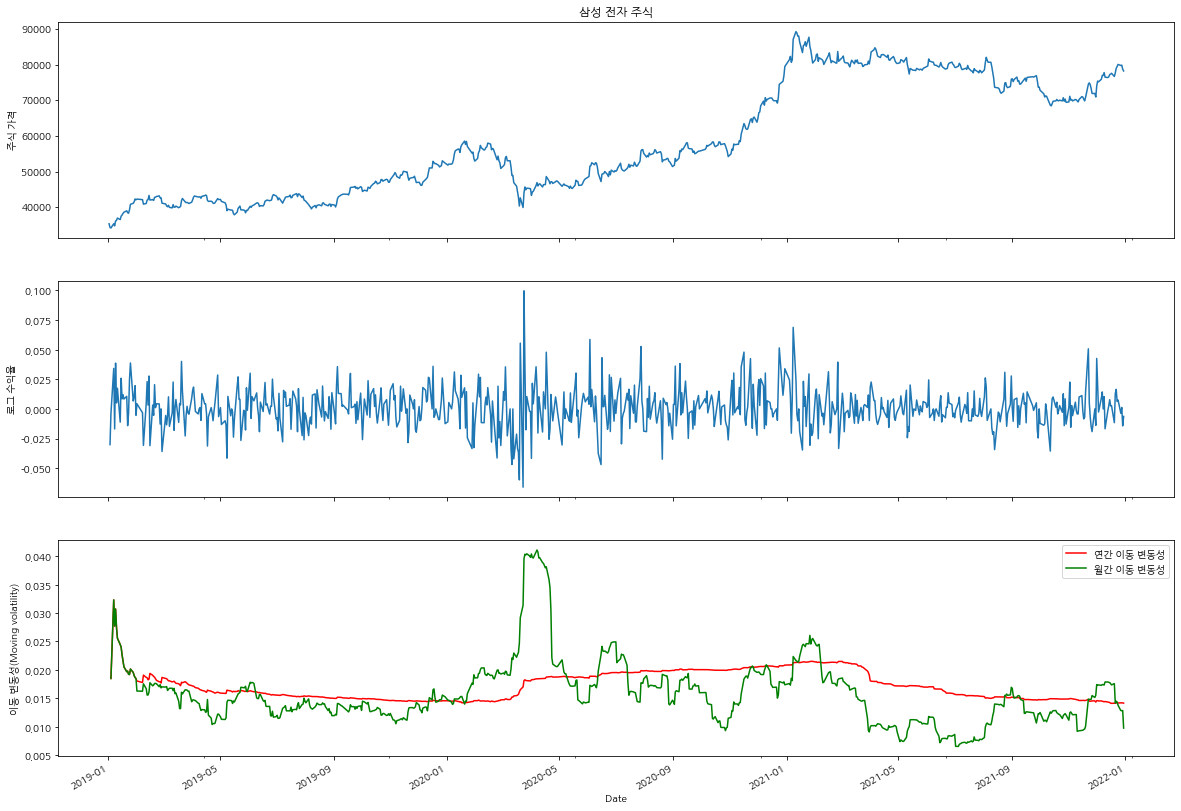

In [70]:
fig,ax = plt.subplots(3,1,figsize=(20,15),sharex=True)

df_samsung.adj_close.plot(ax=ax[0])
ax[0].set(title='삼성 전자 주식',ylabel='주식 가격')

df_samsung.log_return_rate.plot(ax=ax[1])
ax[1].set(ylabel='로그 수익율')

df_samsung['moving_std_252'].plot(ax=ax[2],color='r',label='연간 이동 변동성')
df_samsung['moving_std_21'].plot(ax=ax[2],color='g',label='월간 이동 변동성')

ax[2].set(ylabel='이동 변동성(Moving volatility)',xlabel='Date')
ax[2].legend()

- 변동성에 대한 측청치가 수익률과 음의 상관관계를 가지는 경향성을 보인다. <br> 가격 상승 시 변동성 감소, 가격 하락시 변동성 증가

 레버리지 효과를 조사하는 또 다른 방법을 VIX(CBOE 변동성 지수)를 사용하는 것이다.

S&P500 과 VIX 의 자료를 다운로드하고 전처리

In [75]:
df = yf.download(['^GSPC', '^VIX'], start='1985-01-01', end='2018-12-31',progress=False)
df = df[['Adj Close']]
df.columns = df.columns.droplevel(0)
df = df.rename(columns={'^GSPC': 'sp500', '^VIX': 'vix'})

In [76]:
df

sp500        vix
Date                              
1984-12-31   167.240005        NaN
1985-01-02   165.369995        NaN
1985-01-03   164.570007        NaN
1985-01-04   163.679993        NaN
1985-01-07   164.240005        NaN
...                 ...        ...
2018-12-21  2416.620117  30.110001
2018-12-24  2351.100098  36.070000
2018-12-26  2467.699951  30.410000
2018-12-27  2488.830078  29.959999
2018-12-28  2485.739990  28.340000

[8570 rows x 2 columns]

In [78]:
df['log_return_rate'] = np.log(df.sp500 / df.sp500.shift(1))
df['vol_return_rate'] = np.log(df.vix / df.vix.shift(1))
df.dropna(how='any', axis=0, inplace=True)

In [79]:
corr_coeff = df.log_return_rate.corr(df.vol_return_rate)

ax = sns.regplot(x='log_return_rate', y='vol_return_rate', data=df, line_kws={'color': 'red'})
ax.set(title=f'S&P 500 vs. VIX ($\\rho$ = {corr_coeff:.2f})',ylabel='VIX log returns',xlabel='S&P 500 log returns')

plt.show()

- 로그 수익률과 VIX 지수가 강한 음의 상관관계를 가지고 있음을 알 수 있다.